<a href="https://colab.research.google.com/github/HARSHSANGHAVI11/ML-Files/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
dataset=pd.read_csv("/content/train.csv")

In [ ]:
dataset# Get basic information about the dataset
dataset.info()

# Get statistical summary of the dataset
dataset.describe()

# Check for any missing values
dataset.isnull().sum()

# Check the distribution of target variable if available
if 'target_column_name' in dataset.columns:
    dataset['target_column_name'].value_counts().plot(kind='bar')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [ ]:
# Handle missing values
numerical_features = dataset.select_dtypes(include=['float', 'int']).columns
dataset[numerical_features] = dataset[numerical_features].fillna(dataset[numerical_features].mean())

# Scale numerical features
scaler = StandardScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])


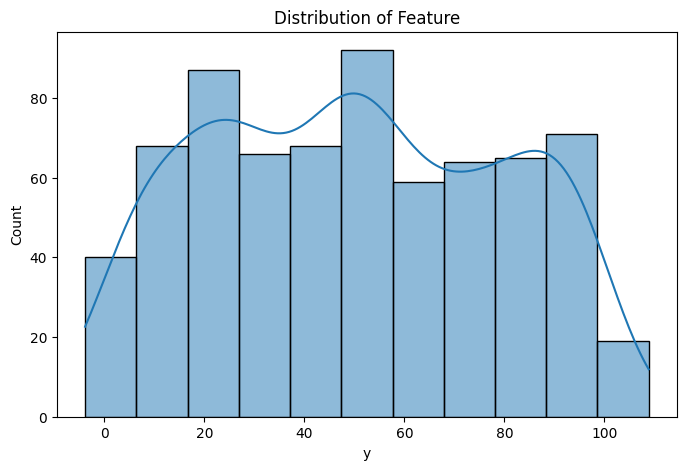

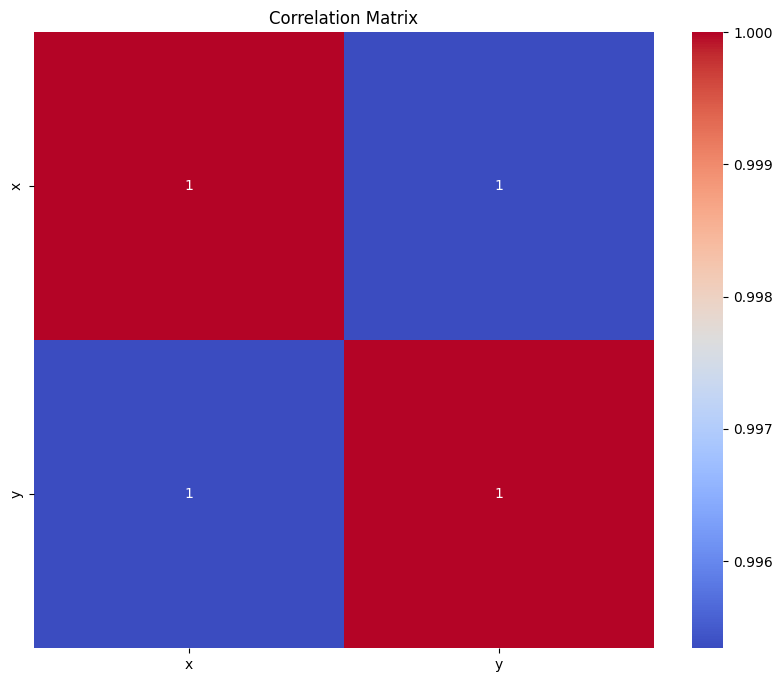

In [ ]:
# Visualize the distribution of a specific feature
plt.figure(figsize=(8, 5))
sns.histplot(dataset['y'], kde=True)
plt.title('Distribution of Feature')
plt.show()


# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Separate features and target variable
X = dataset.drop('x', axis=1)
y = dataset['y']

# Display the shape of X and y
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)


Features Shape: (700, 1)
Target Shape: (700,)


In [ ]:
dataset.shape

(700, 2)

In [ ]:
dataset.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


<Axes: >

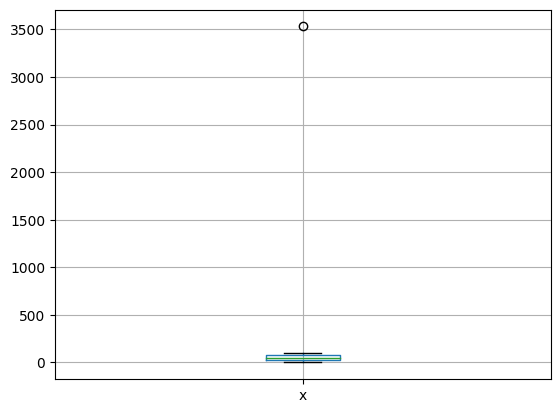

In [ ]:
x_value=dataset.iloc[0:700,0:1]
y_value=dataset.iloc[0:700,0:2]
x_value.boxplot(column=['x'])

<Axes: >

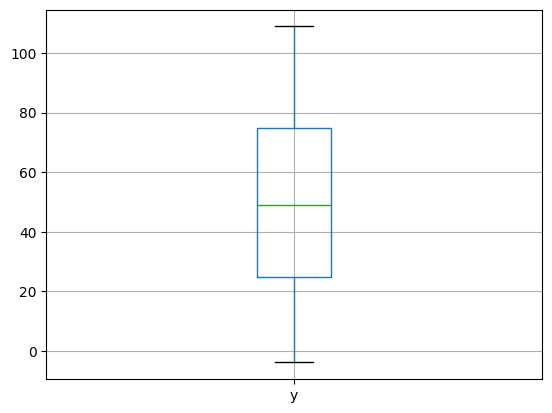

In [ ]:
y_value.boxplot(column=['y'])

ValueError: x and y must be the same size

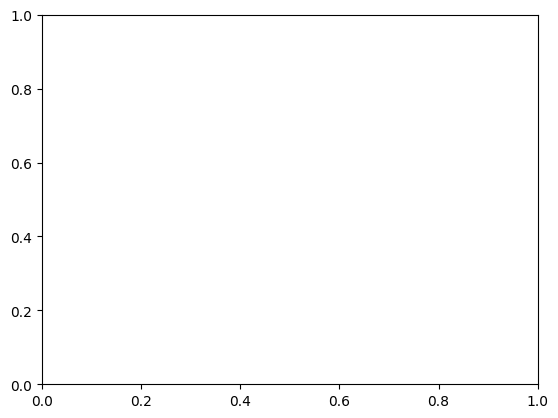

In [ ]:
plt.scatter(x_value,y_value)


In [ ]:
clean_dataset=dataset.dropna()

In [ ]:
clean_dataset.shape

(699, 2)

In [ ]:
x_feature=clean_dataset['x']
y_feature=clean_dataset['y']

In [ ]:
#ml model
def hypothesis(theta_array,x):
  return theta_array[0]+theta_array[1]*x

In [ ]:
# prompt: Find the best fit line to the given dataset

def cost_function(theta_array,x,y):
  total_error=0
  for i in range(len(x)):
    total_error+=(hypothesis(theta_array,x[i])-y[i])**2
  return total_error/(2*len(x))
def gradient_descent(theta_array,x,y,alpha,iterations):
  m=len(x)
  J_all=[]
  for _ in range(iterations):
    derivative_0=0
    derivative_1=0
    for i in range(m):
      derivative_0+=(hypothesis(theta_array,x[i])-y[i])
      derivative_1+=(hypothesis(theta_array,x[i])-y[i])*x[i]
    temp0=theta_array[0]-alpha*derivative_0/m
    temp1=theta_array[1]-alpha*derivative_1/m
    theta_array[0]=temp0
    theta_array[1]=temp1
    J_all.append(cost_function(theta_array,x,y))
  return theta_array,J_all
theta_array=np.array([0.0,0.0])
alpha=0.01
iterations=1000
theta_array,J_all=gradient_descent(theta_array,x,y,alpha,iterations)
print(theta_array)
# Plot the best fit line
plt.scatter(x, y)
plt.plot(x, hypothesis(theta_array, x_feature), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.show()


NameError: name 'x' is not defined

In [ ]:
def costfunction(theta_array,x,y,m):
  total_cost=0
  for i in range(m):
    total_cost+=((theta_array[0]+theta_array[1]*x[i])-y[i])**2
  return total_cost/(2*m)


In [ ]:
def gradientdescent(theta_array,x,y,m,alpha):
  summation_0=0
  summation_1=0
  for i in range(m):
    summation_0+=((theta_array[0]+theta_array[1]*x[i])-y[i])
    summation_1+=(((theta_array[0]+theta_array[1]*x[i])-y[i])*x[i])

  new_theta0 = theta_array[0] - (summation_0*alpha/m)
  new_theta1 = theta_array[1] - (summation_1*alpha/m)
  improvised_theta=[new_theta0,new_theta1]
  print(improvised_theta)
  return improvised_theta


In [ ]:
def training(x,y,alpha,epochs):
  theta_0 = 0
  theta_1 = 1
  m = x.size
  cost_values=[]
  theta_array=[theta_0,theta_1]
  for i in range(epochs):
    theta_array = gradientdescent(theta_array,x,y,m,alpha)
    loss = costfunction(theta_array,x,y,m)
    cost_values.append(loss)
    y_new=theta_array[0]+theta_array[1]*x
    plt.plot(x,y_new,'r')
    plt.scatter(x,y)
    plt.show()


  x=np.arange(0,epochs)
  plt.plot(x,cost_values)
  plt.show()


In [ ]:
alpha=0.0001
epochs=100


In [ ]:
type(x_feature)

pandas.core.series.Series

In [ ]:
x_feature=x_feature.values.reshape(x_feature.size)

In [ ]:
y_feature=y_feature.values.reshape(y_feature.size)

[-7.443698118741065e-06, 0.9996826587379767]


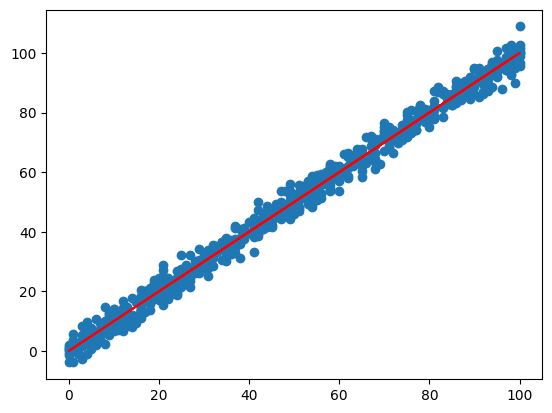

[-1.3299491564331702e-05, 0.9994713021952731]


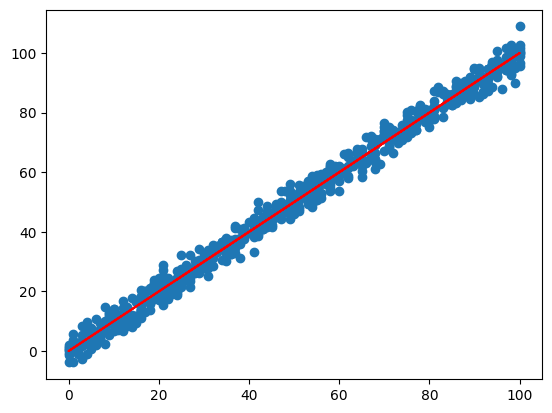

[-1.809761434718499e-05, 0.9993305383929294]


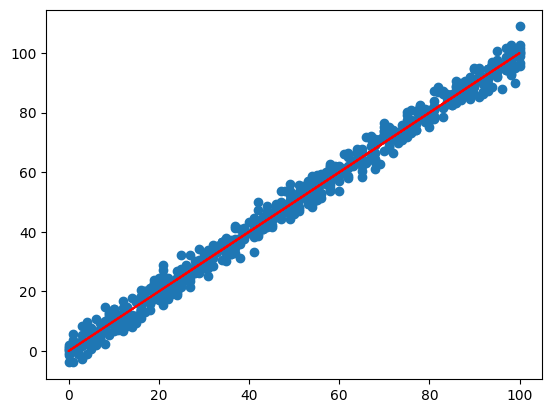

[-2.2191236927211436e-05, 0.9992367939629212]


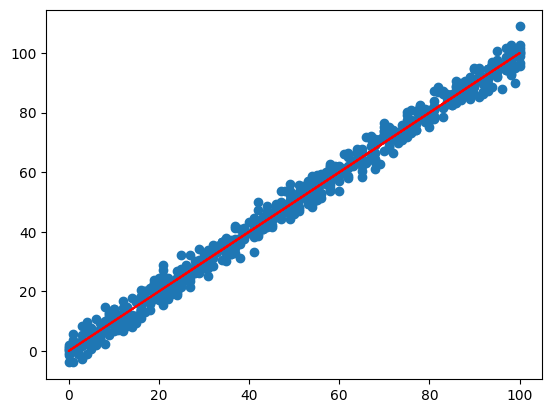

[-2.5815593882735587e-05, 0.9991743675035092]


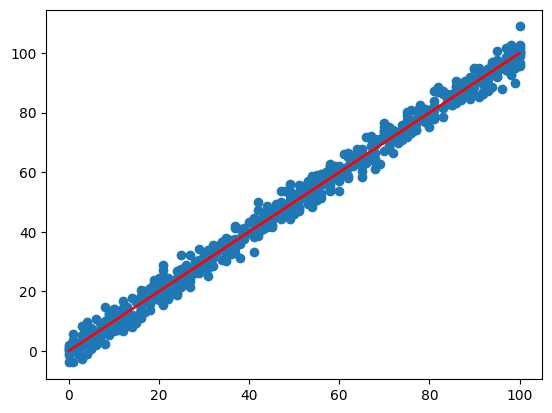

[-2.9127366797264444e-05, 0.9991328008563032]


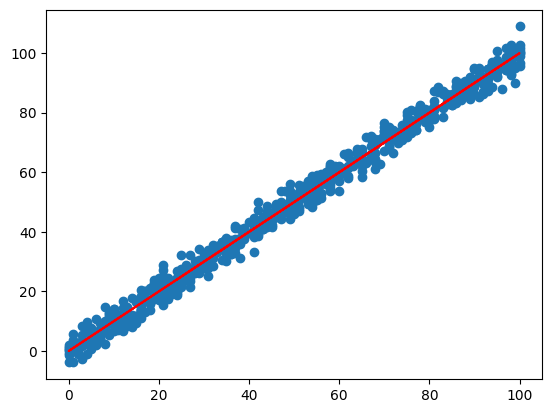

[-3.223091583259602e-05, 0.9991051282052106]


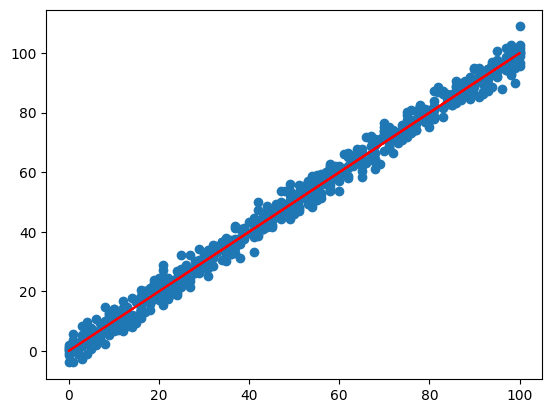

[-3.519575166864666e-05, 0.9990867098620545]


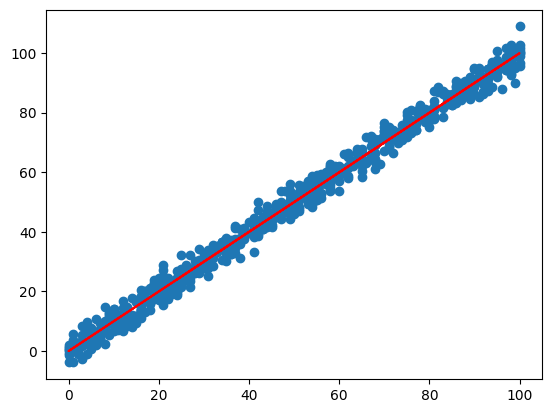

[-3.8068172955772495e-05, 0.9990744554916763]


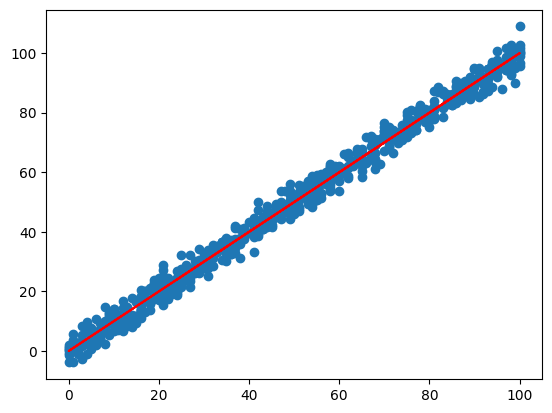

[-4.087901761759039e-05, 0.9990663067291539]


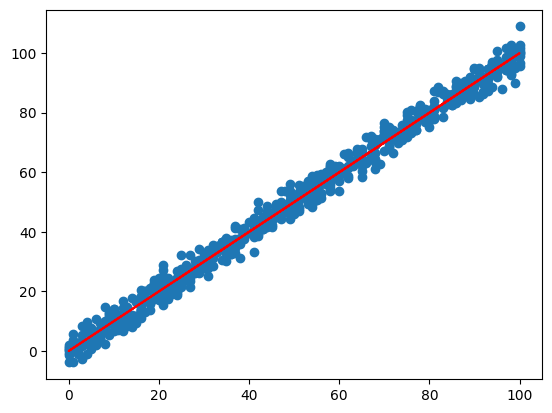

[-4.364882572458667e-05, 0.9990608925690997]


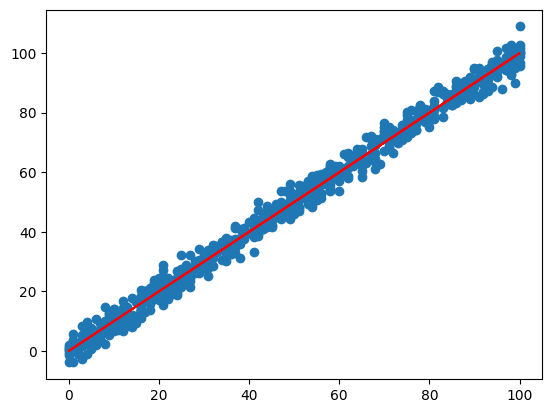

[-4.6391278304922e-05, 0.9990572998324398]


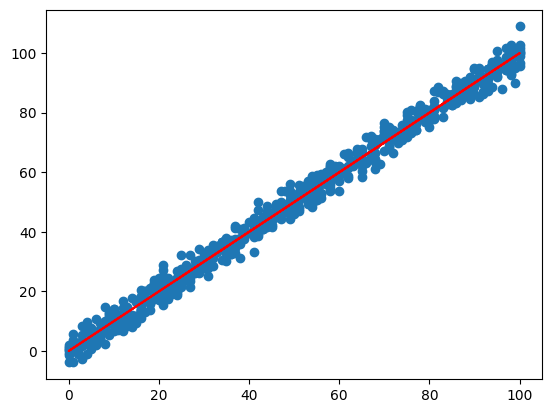

[-4.9115487816876635e-05, 0.999054920282308]


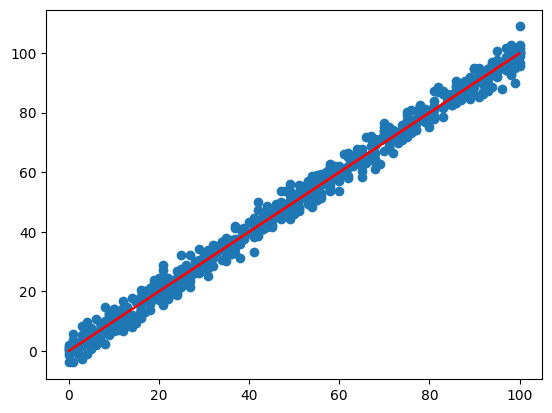

[-5.182752375300041e-05, 0.9990533487932515]


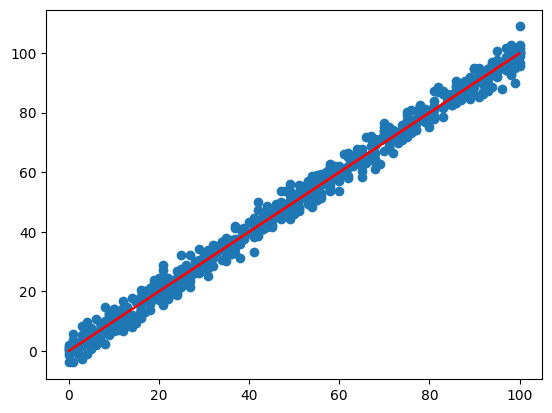

[-5.453142879205181e-05, 0.9990523155252761]


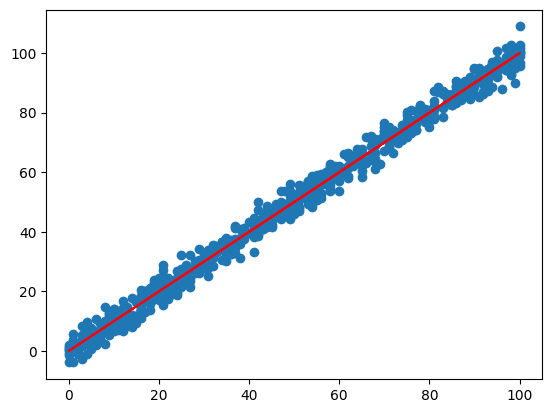

[-5.72298956225136e-05, 0.9990516407473334]


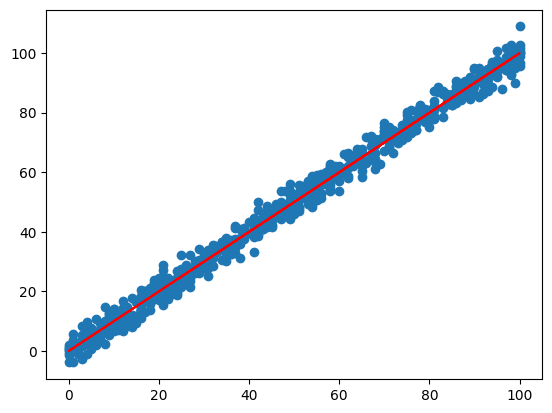

[-5.9924717751231406e-05, 0.9990512047468142]


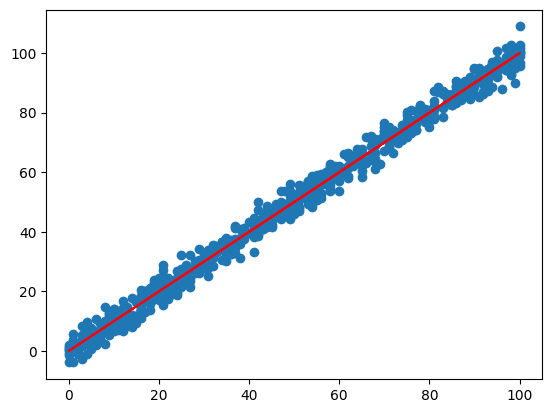

[-6.261708977139121e-05, 0.9990509277873069]


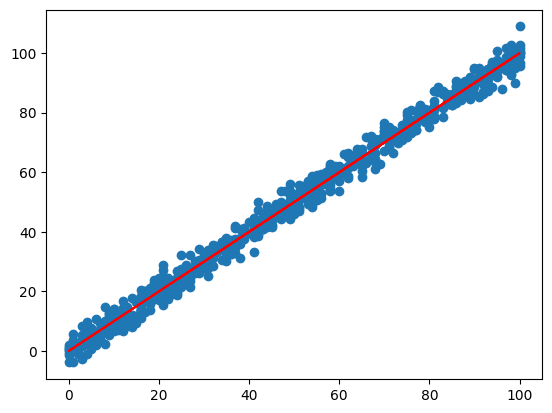

[-6.53078073605898e-05, 0.9990507567591571]


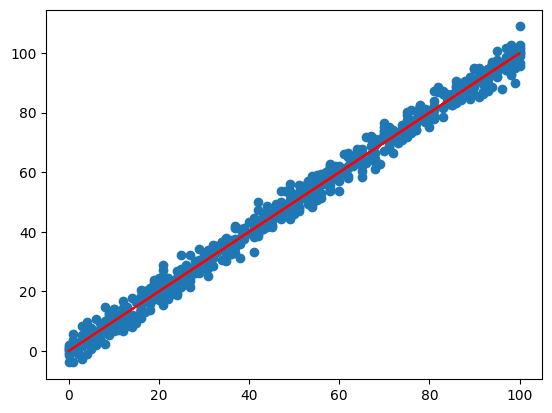

[-6.799740049260515e-05, 0.9990506562878685]


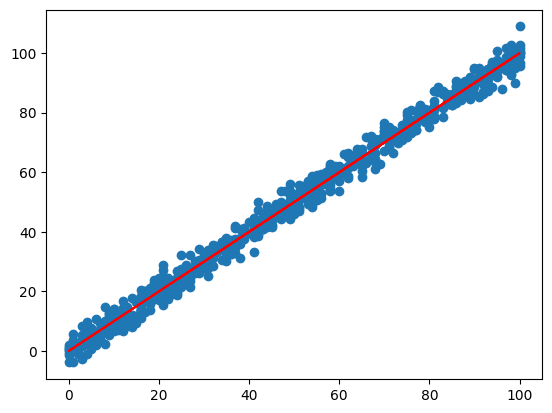

[-7.068622216512849e-05, 0.9990506028117176]


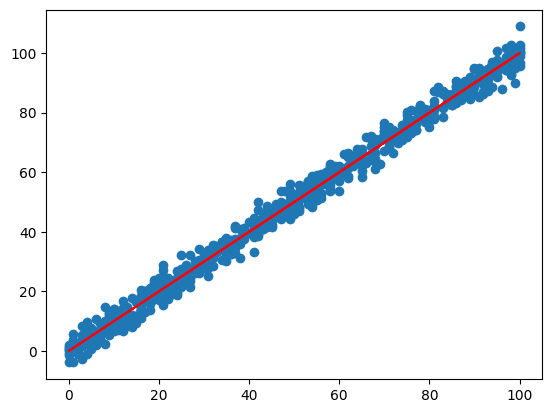

[-7.337450749822676e-05, 0.9990505806370588]


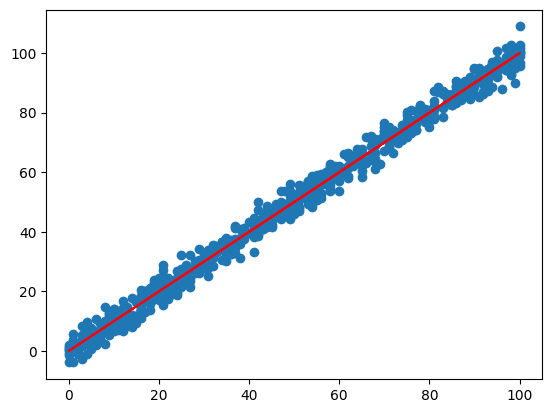

[-7.60624130977738e-05, 0.9990505793108997]


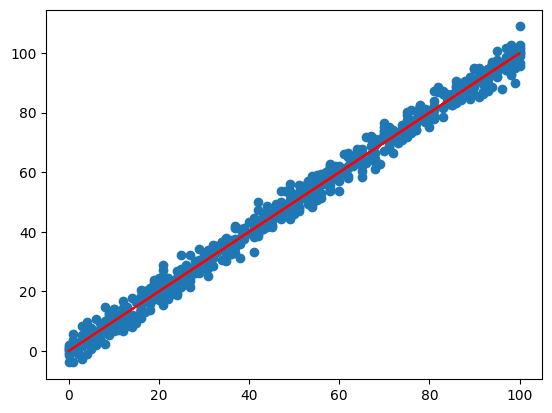

[-7.875004327406801e-05, 0.9990505918708652]


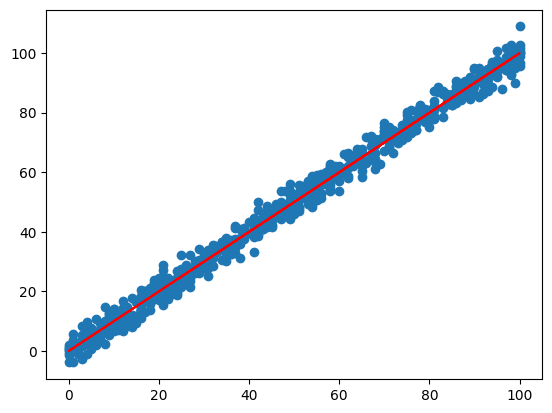

[-8.14374675051409e-05, 0.9990506136795589]


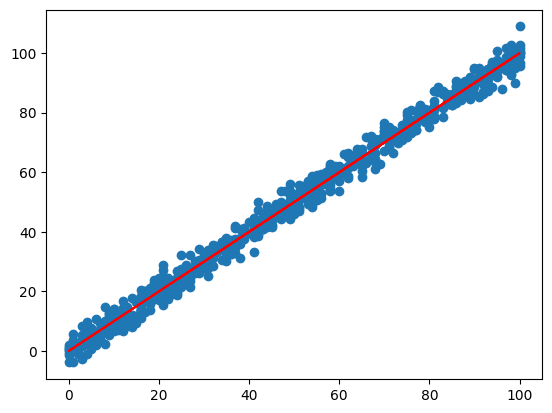

[-8.412473206845923e-05, 0.9990506416481724]


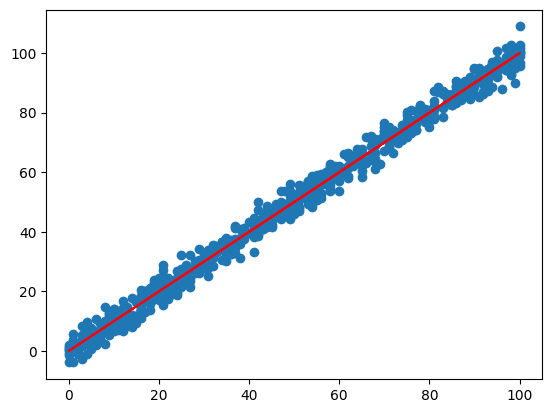

[-8.68118677884005e-05, 0.9990506737193574]


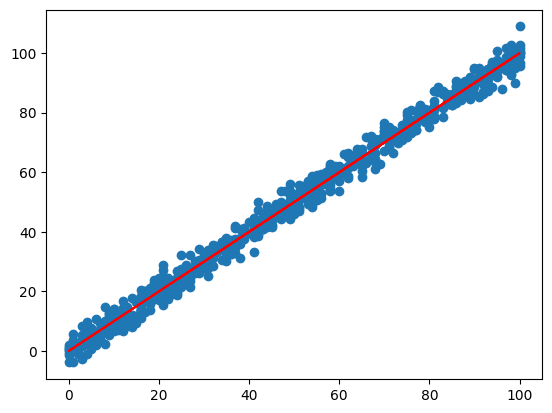

[-8.949889519657659e-05, 0.9990507085227859]


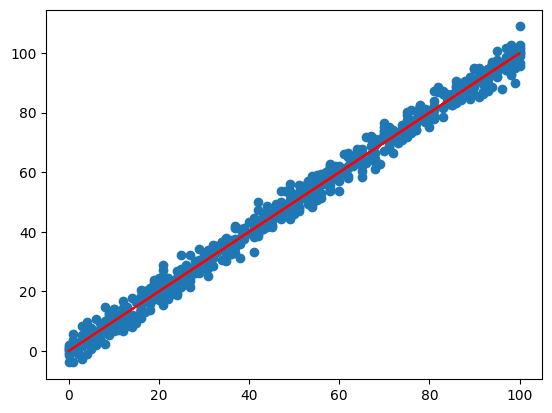

[-9.218582796894458e-05, 0.9990507451457298]


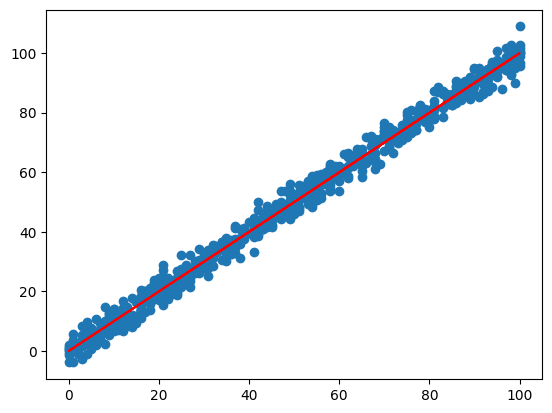

[-9.487267521514826e-05, 0.9990507829802528]


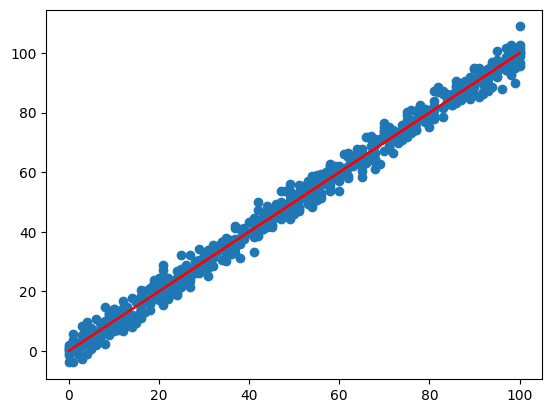

[-9.755944300336911e-05, 0.9990508216214297]


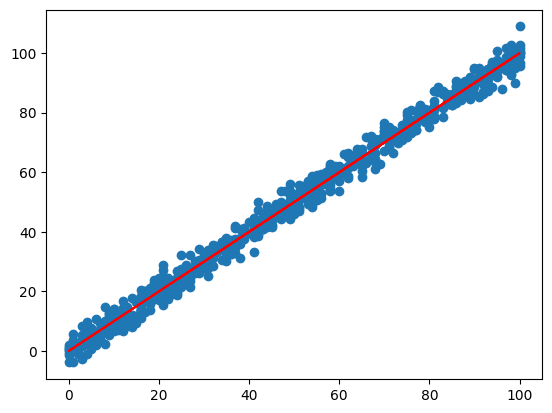

[-0.00010024613537597579, 0.9990508607995536]


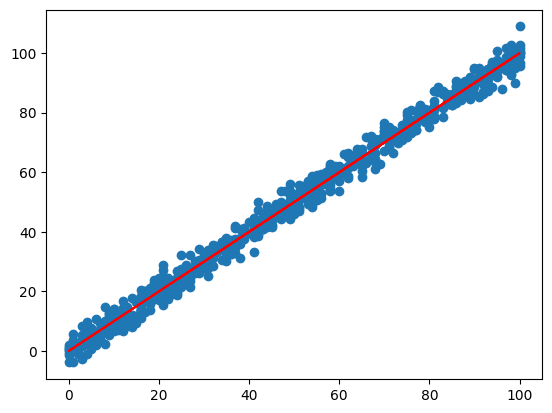

[-0.00010293275502601412, 0.9990509003349825]


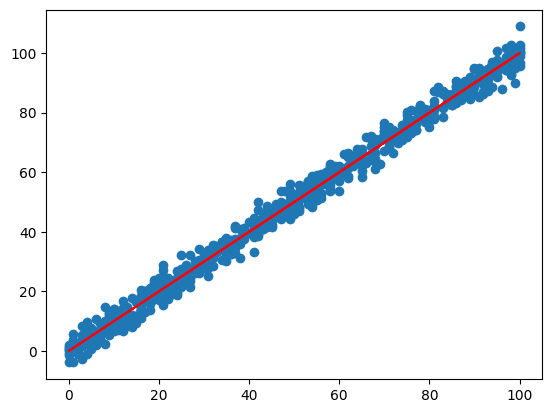

[-0.00010561930374779136, 0.9990509401080627]


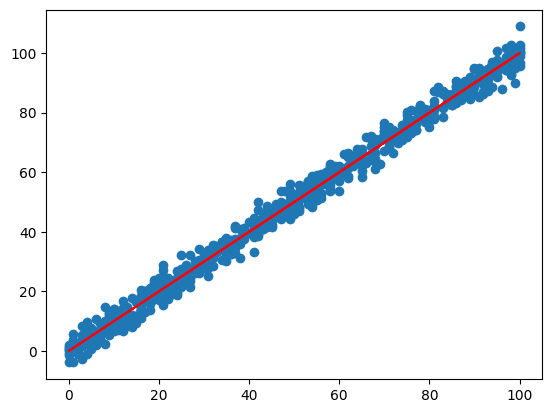

[-0.00010830578273699774, 0.9990509800390974]


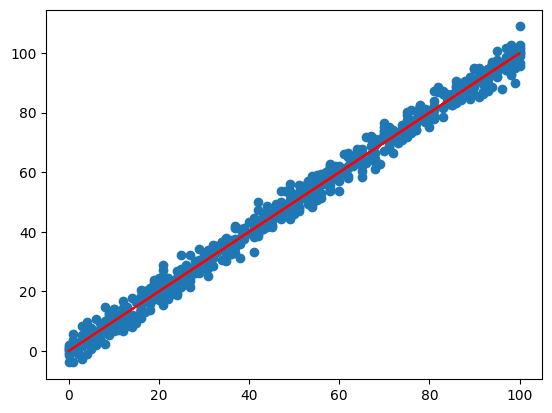

[-0.00011099219279060483, 0.9990510200750031]


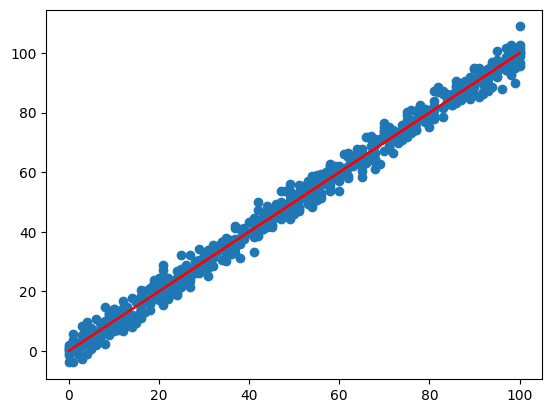

[-0.00011367853444001112, 0.9990510601804228]


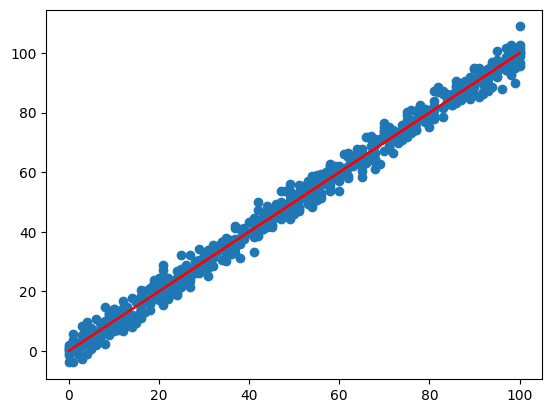

[-0.0001163648080397257, 0.9990511003318064]


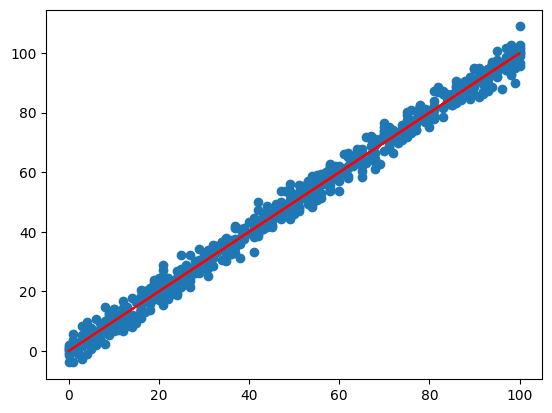

[-0.00011905101382644029, 0.9990511405134682]


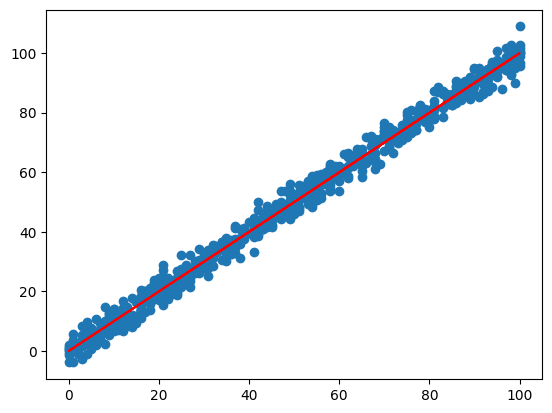

[-0.00012173715195836942, 0.9990511807149604]


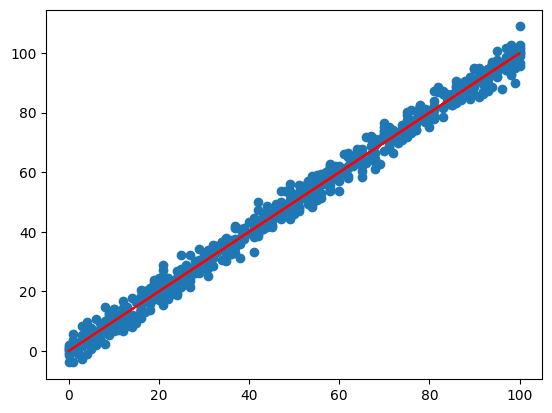

[-0.00012442322254145895, 0.9990512209293239]


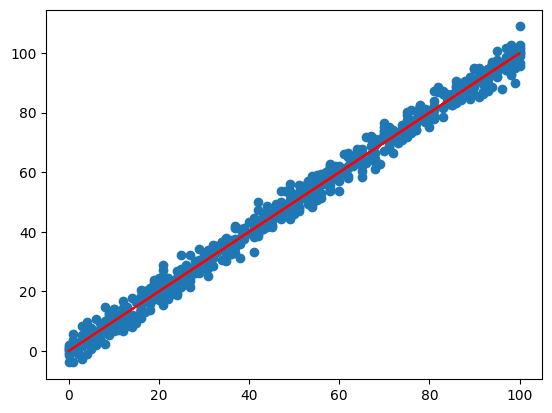

[-0.00012710922564683868, 0.9990512611519237]


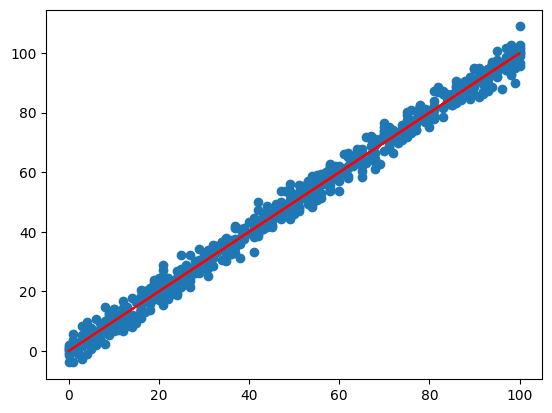

[-0.00012979516132245028, 0.9990513013796725]


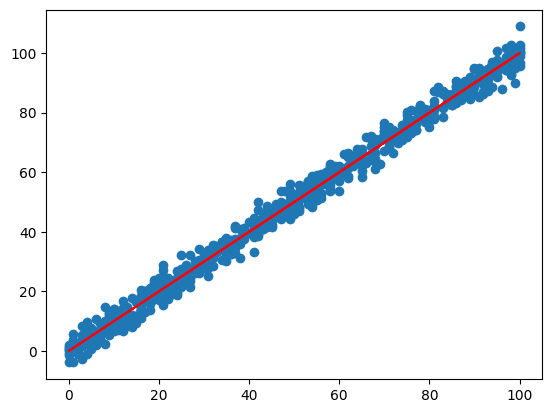

[-0.0001324810296007885, 0.9990513416105141]


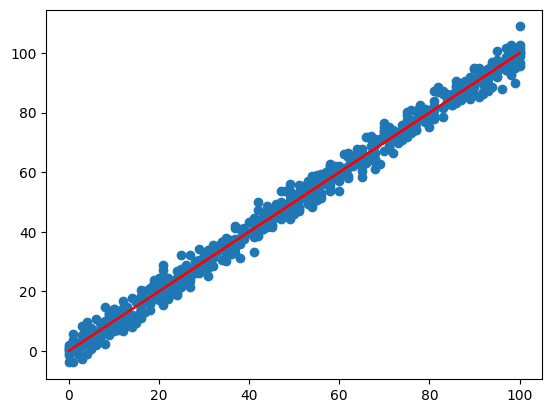

[-0.00013516683050406232, 0.9990513818430788]


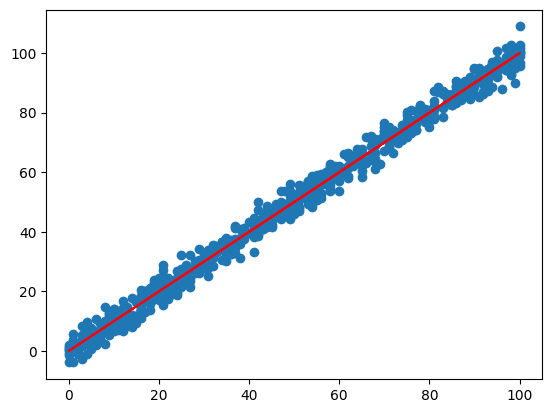

[-0.00013785256404762666, 0.9990514220764544]


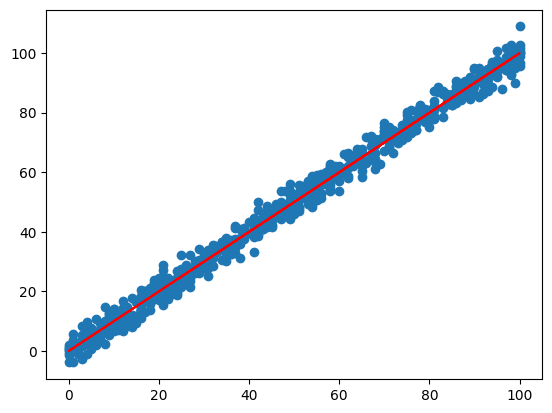

[-0.00014053823024227257, 0.9990514623100332]


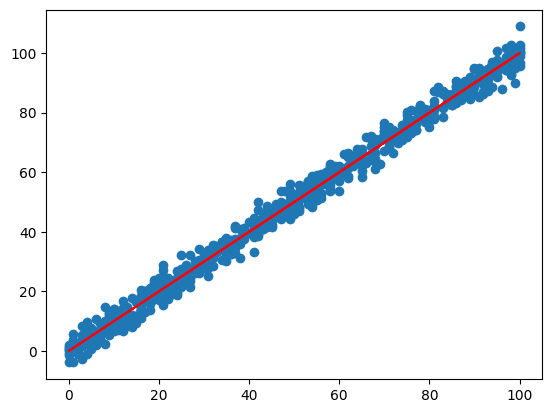

[-0.00014322382909575195, 0.9990515025434106]


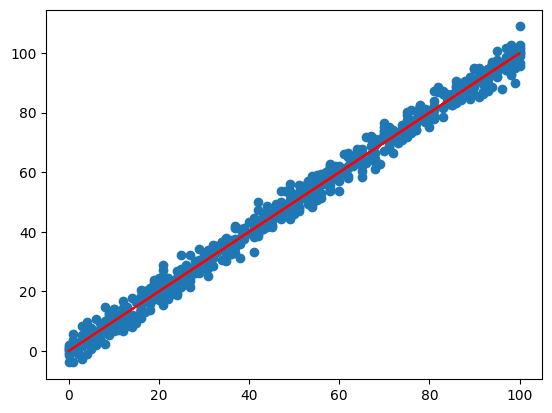

[-0.00014590936061379122, 0.999051542776317]


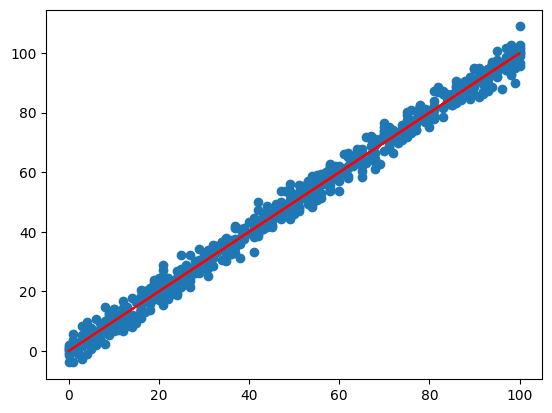

[-0.00014859482480076907, 0.9990515830085729]


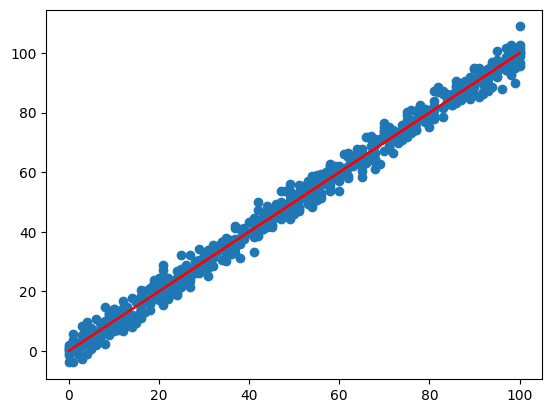

[-0.0001512802216601641, 0.9990516232400587]


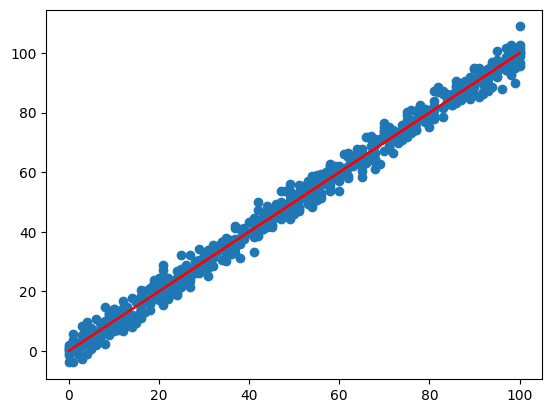

[-0.00015396555119485828, 0.9990516634706947]


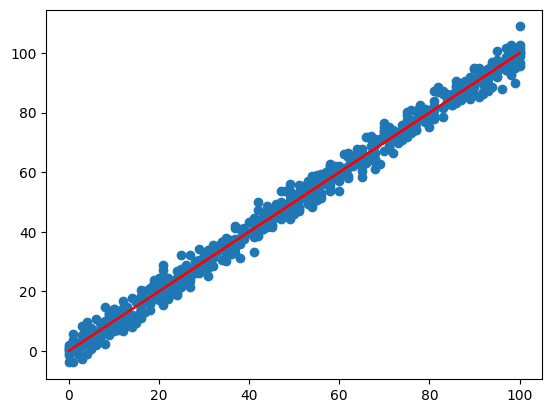

[-0.0001566508134073339, 0.9990517037004281]


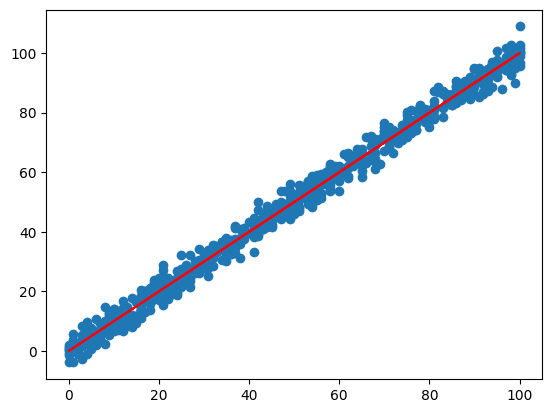

[-0.0001593360082998078, 0.9990517439292234]


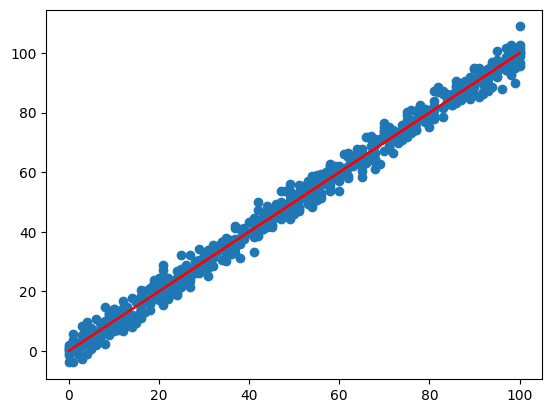

[-0.00016202113587432114, 0.999051784157057]


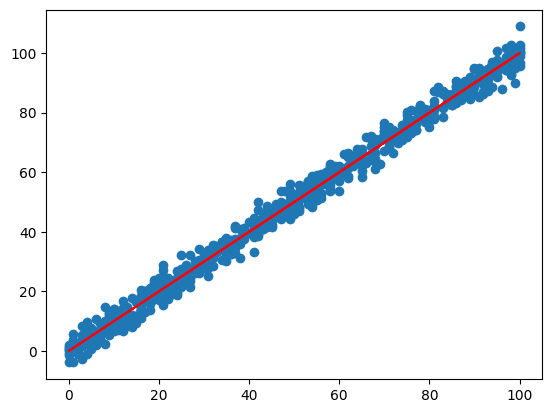

[-0.00016470619613279542, 0.9990518243839134]


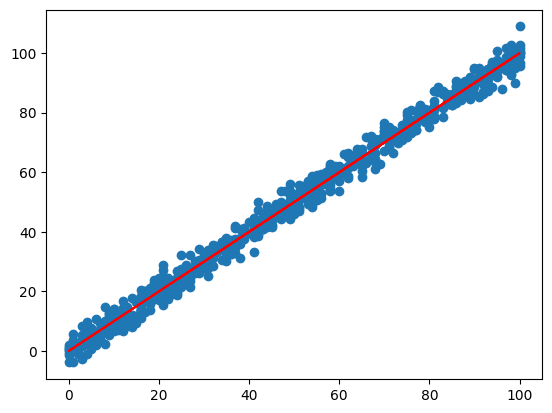

[-0.00016739118907707526, 0.9990518646097821]


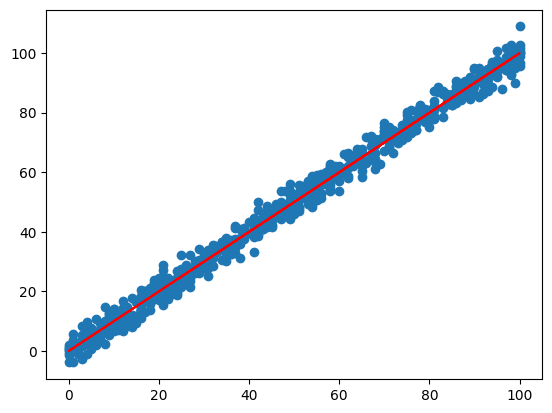

[-0.00017007611470895177, 0.9990519048346563]


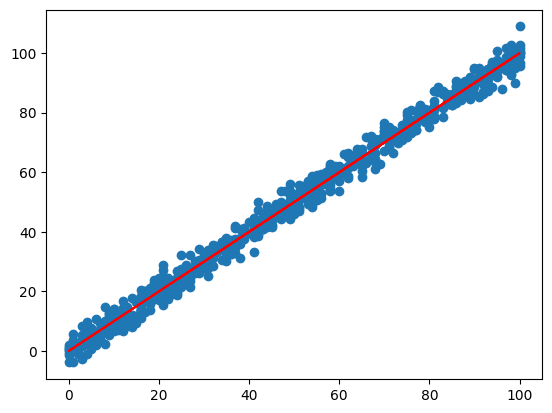

[-0.0001727609730301826, 0.9990519450585313]


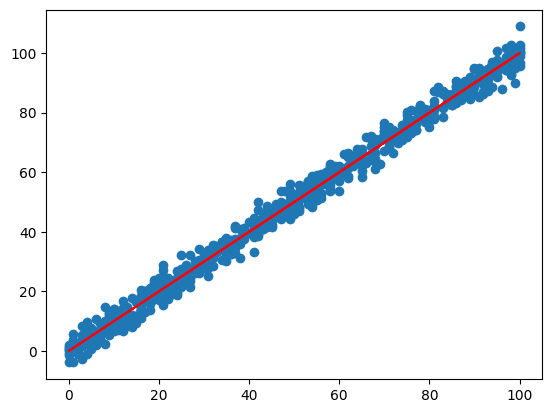

[-0.00017544576404250134, 0.9990519852814042]


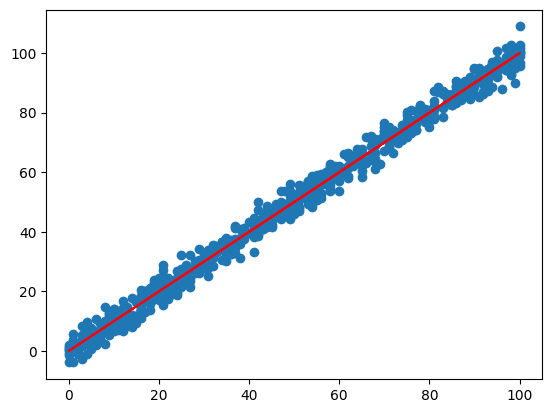

[-0.00017813048774762628, 0.9990520255032727]


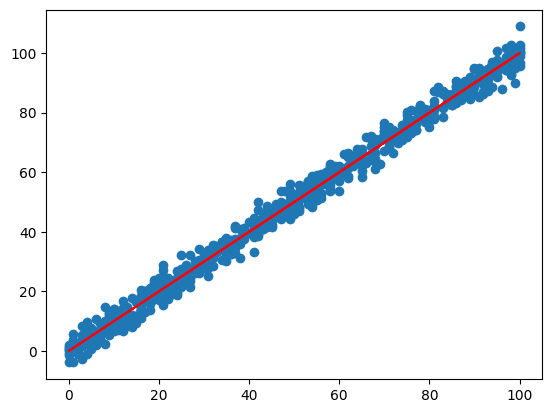

[-0.00018081514414726508, 0.9990520657241355]


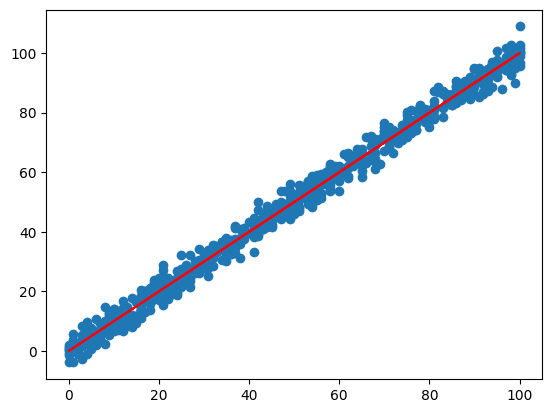

[-0.00018349973324311892, 0.9990521059439919]


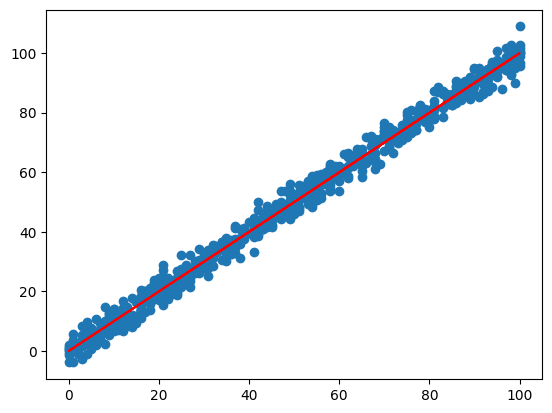

[-0.00018618425503688405, 0.9990521461628411]


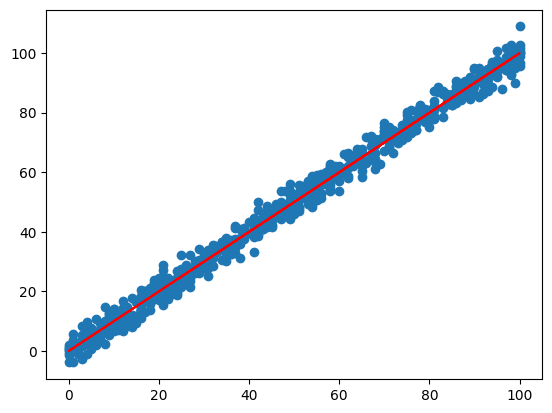

[-0.00018886870953025364, 0.9990521863806829]


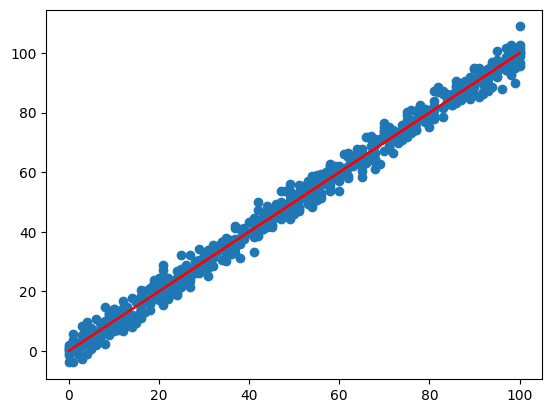

[-0.00019155309672491954, 0.999052226597517]


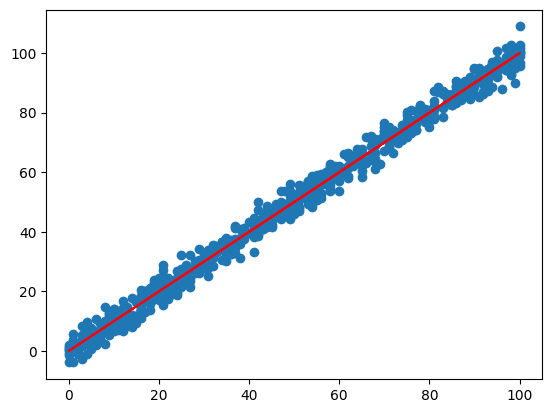

[-0.000194237416622571, 0.9990522668133432]


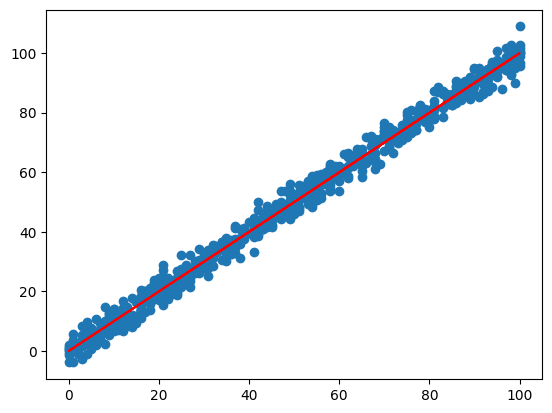

[-0.00019692166922489736, 0.9990523070281615]


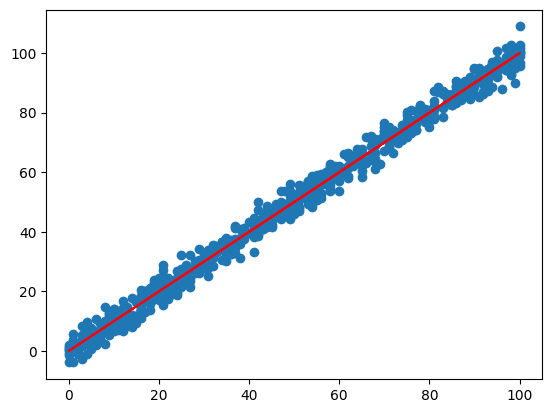

[-0.00019960585453358655, 0.9990523472419717]


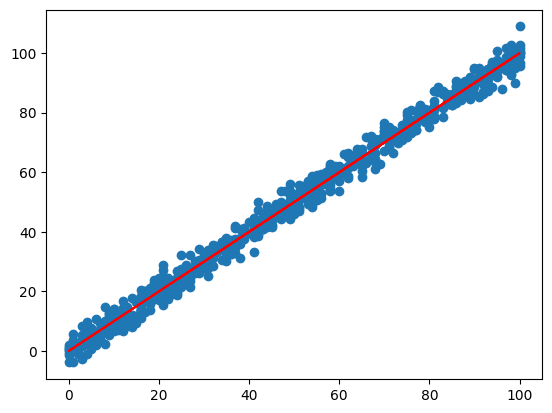

[-0.00020228997255032632, 0.9990523874547739]


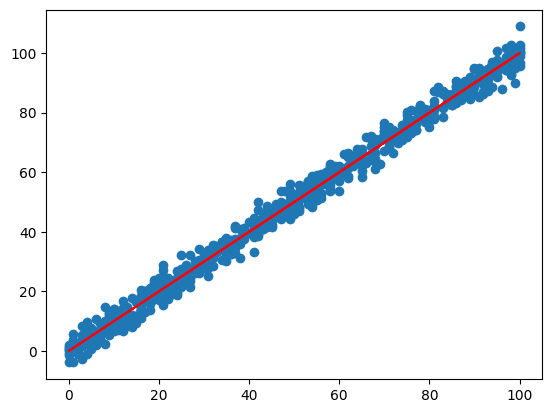

[-0.00020497402327680458, 0.999052427666568]


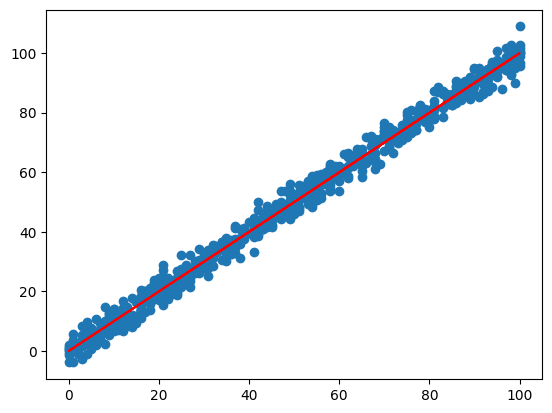

[-0.00020765800671470827, 0.999052467877354]


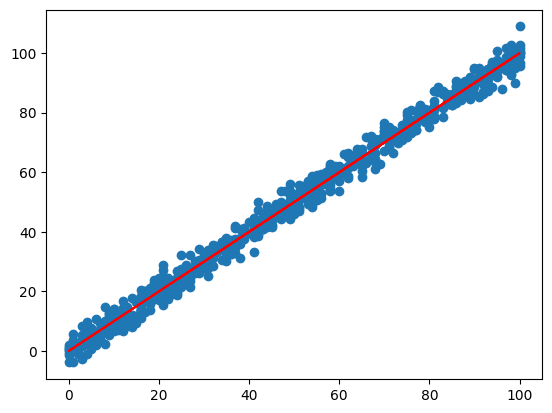

[-0.0002103419228657244, 0.999052508087132]


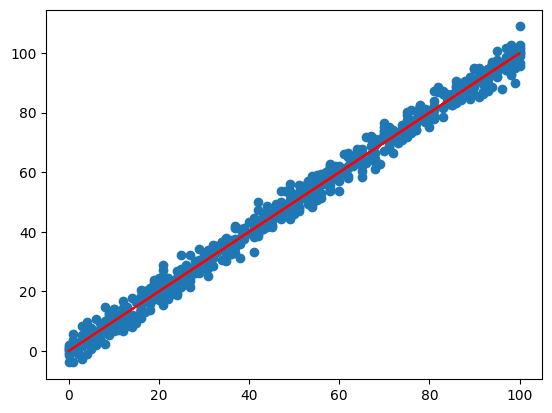

[-0.00021302577173153996, 0.999052548295902]


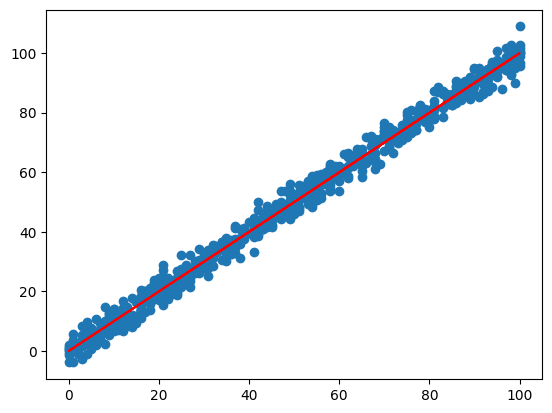

[-0.00021570955331384227, 0.999052588503664]


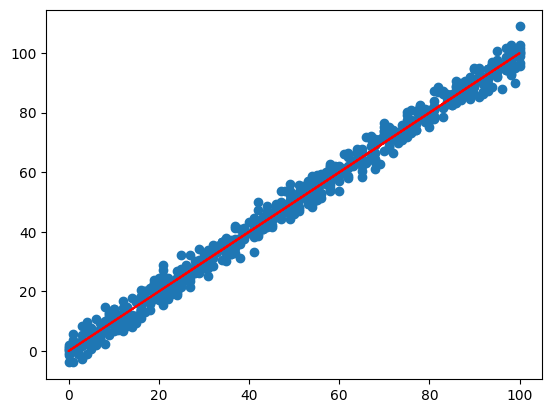

[-0.0002183932676143179, 0.999052628710418]


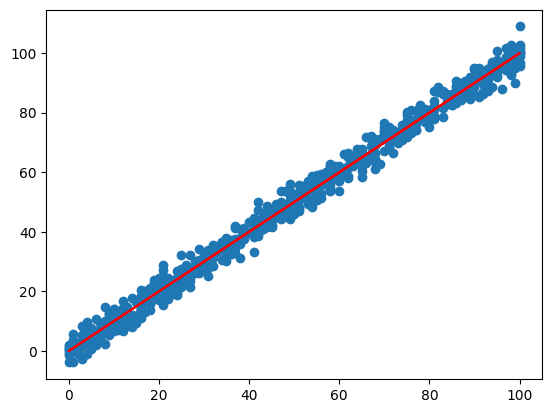

[-0.0002210769146346541, 0.999052668916164]


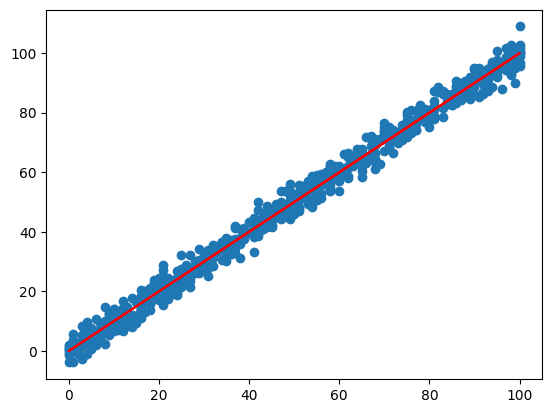

[-0.00022376049437653666, 0.999052709120902]


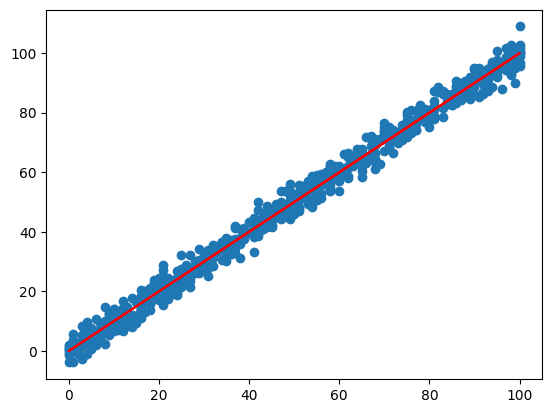

[-0.00022644400684165332, 0.9990527493246322]


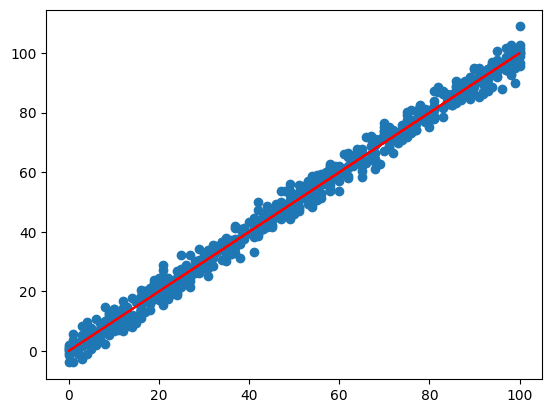

[-0.0002291274520316903, 0.9990527895273544]


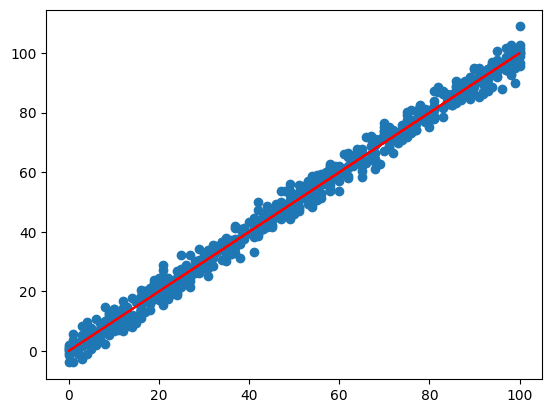

[-0.0002318108299483343, 0.9990528297290688]


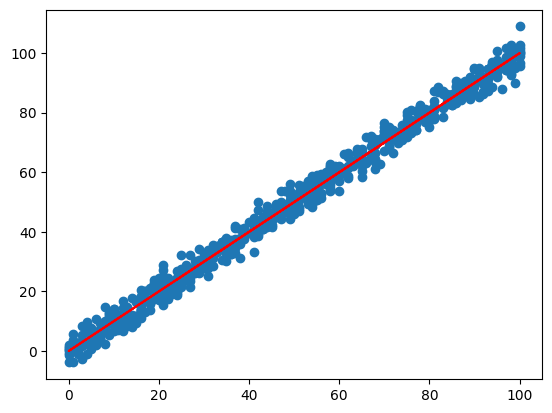

[-0.00023449414059327196, 0.9990528699297754]


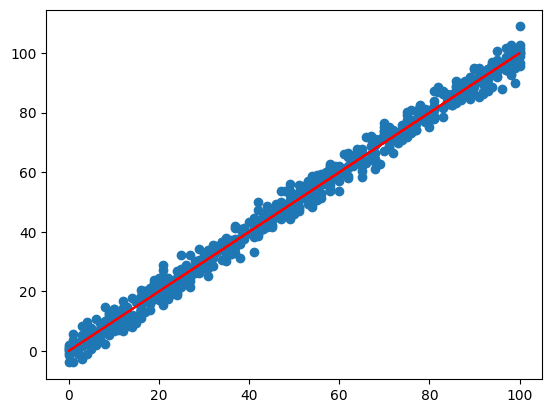

[-0.0002371773839681892, 0.9990529101294741]


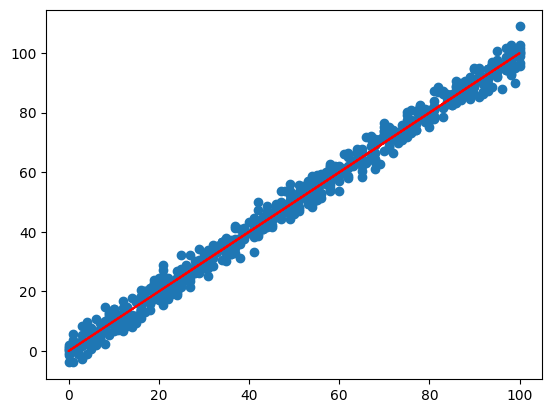

[-0.000239860560074773, 0.999052950328165]


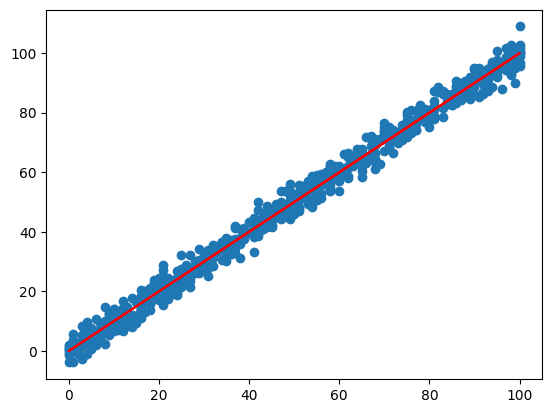

[-0.00024254366891470969, 0.9990529905258481]


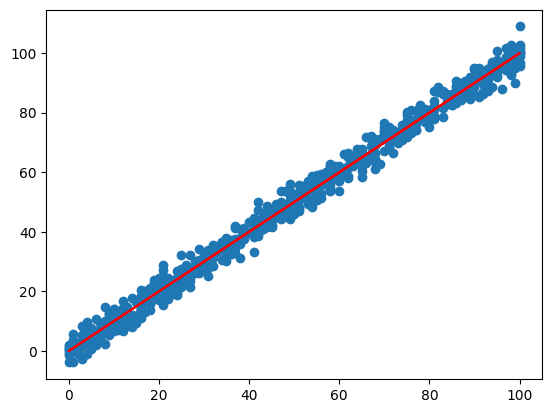

[-0.00024522671048968474, 0.9990530307225235]


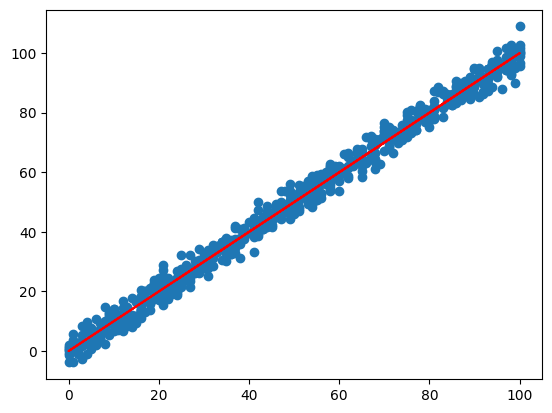

[-0.0002479096848013856, 0.9990530709181912]


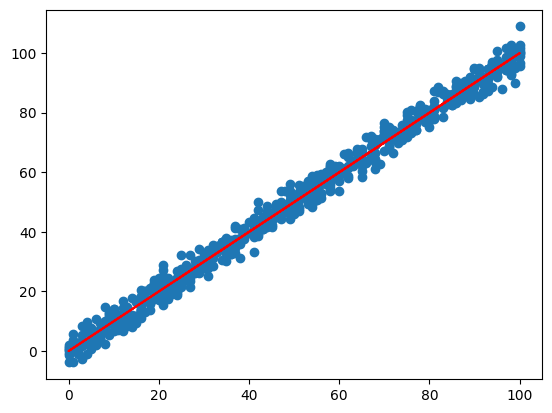

[-0.0002505925918514982, 0.9990531111128511]


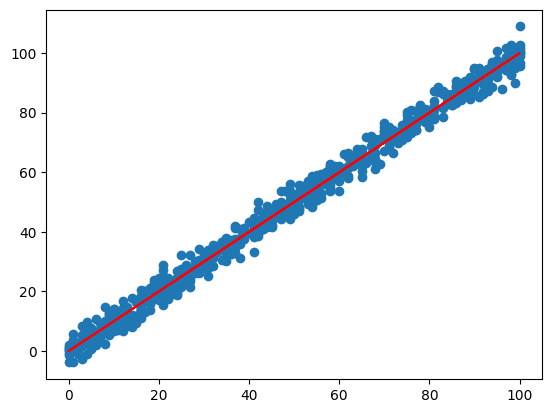

[-0.00025327543164170845, 0.9990531513065034]


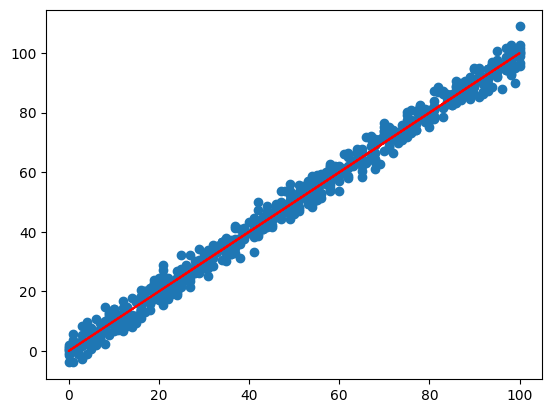

[-0.0002559582041737029, 0.9990531914991481]


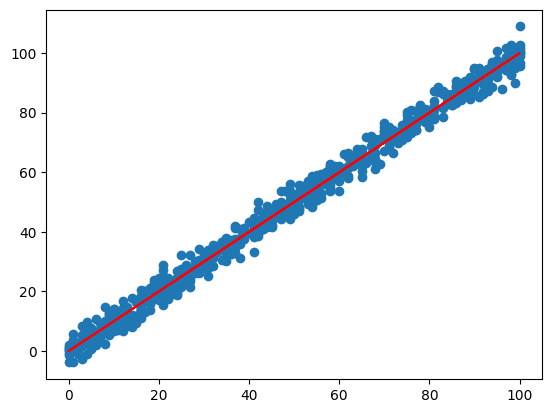

[-0.0002586409094491676, 0.9990532316907851]


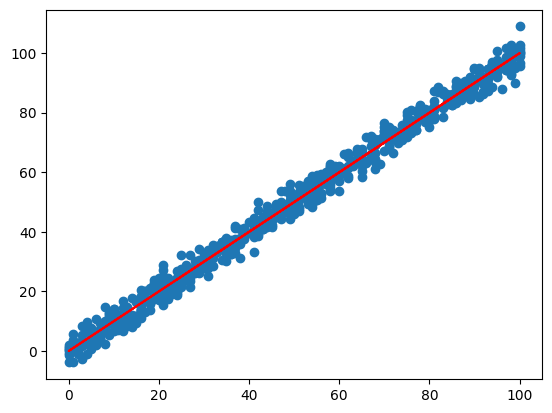

[-0.0002613235474697887, 0.9990532718814146]


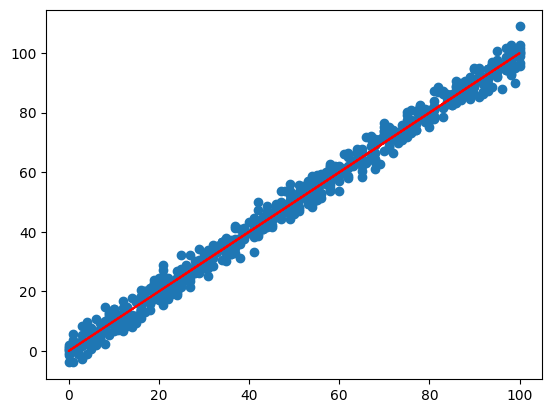

[-0.00026400611823725224, 0.9990533120710364]


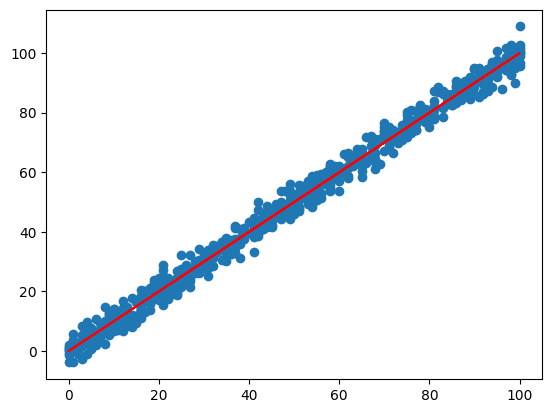

[-0.0002666886217532443, 0.9990533522596508]


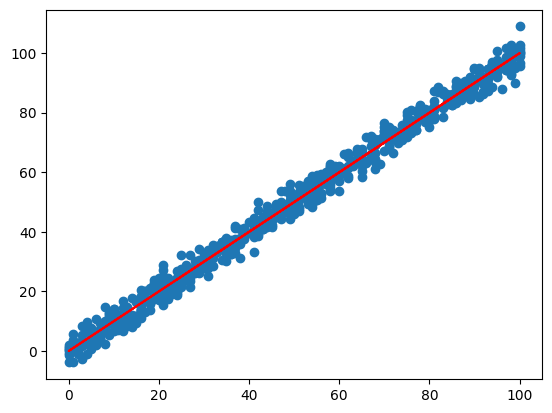

[-0.00026937105801945124, 0.9990533924472575]


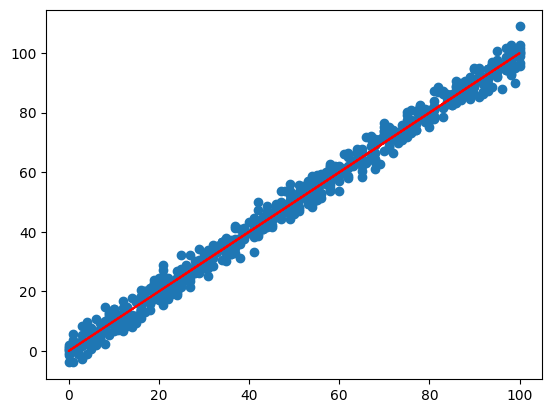

[-0.00027205342703755817, 0.9990534326338569]


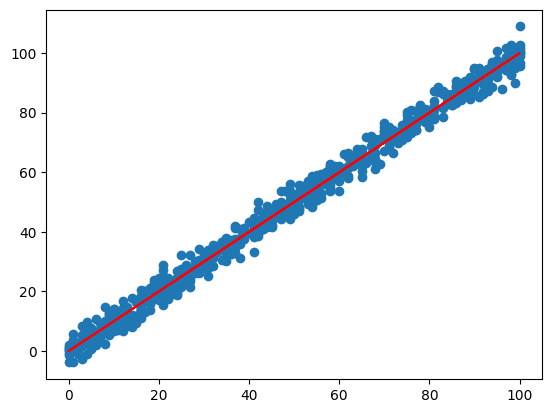

[-0.0002747357288092518, 0.9990534728194488]


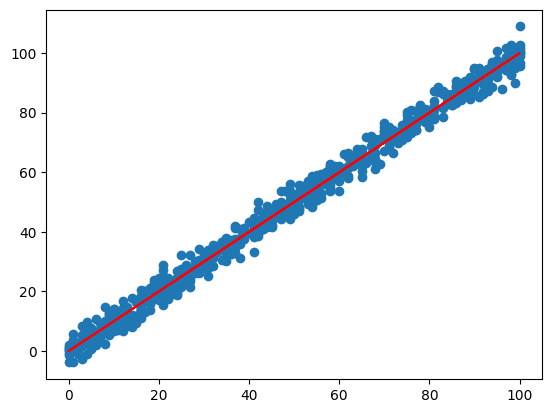

[-0.0002774179633362178, 0.9990535130040332]


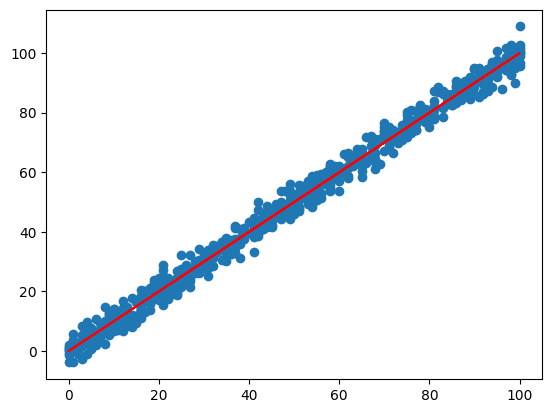

[-0.00028010013062014196, 0.9990535531876101]


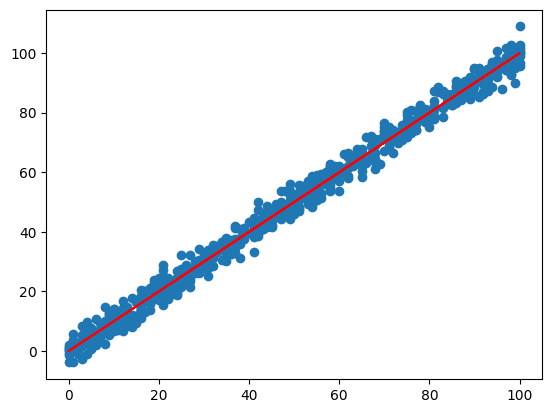

[-0.0002827822306627094, 0.9990535933701797]


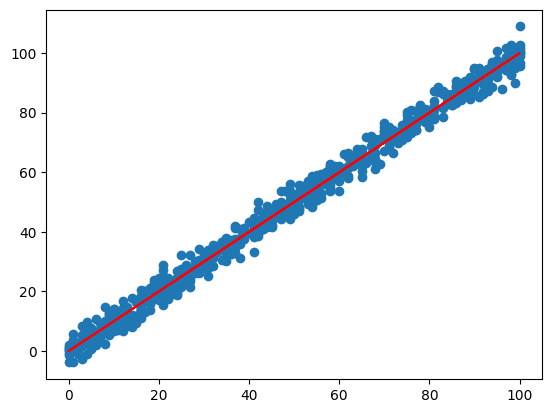

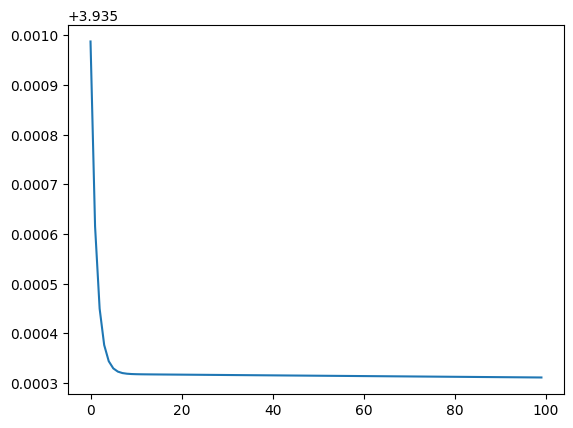

In [ ]:
training(x_feature,y_feature,alpha,epochs)

In [ ]:
# prompt: Datapoints scattering (without best fit line)

plt.scatter(x_feature, y_feature)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Data Points')
plt.show()


NameError: name 'x_feature' is not defined

In [ ]:
# prompt: Observe the cost function vs iterations learning curve

# Add this code to the end of the preceding code to plot the cost function vs iterations
plt.plot(range(iterations), J_all)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations')
plt.show()


NameError: name 'J_all' is not defined

In [ ]:
# Get basic information about the dataset
dataset.info()

# Get statistical summary of the dataset
dataset.describe()

# Check for any missing values
dataset.isnull().sum()

# Check the distribution of target variable if available
if 'target_column_name' in dataset.columns:
    dataset['target_column_name'].value_counts().plot(kind='bar')


NameError: name 'dataset' is not defined